2.​ Problem Statement

Build the linear regression model using scikit learn in boston data to predict 'Price'
based on other dependent variable.
Here is the code to load the data

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline


In [28]:
from sklearn.datasets import load_boston
boston=load_boston()
bos=pd.DataFrame(boston.data)

In [29]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [38]:
bos.shape

(506, 13)

In [40]:
bos.columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT']

In [42]:
bos['Price']=boston.target

In [43]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Data Preprocessing-

To find the effect of feature columns on the output columns.

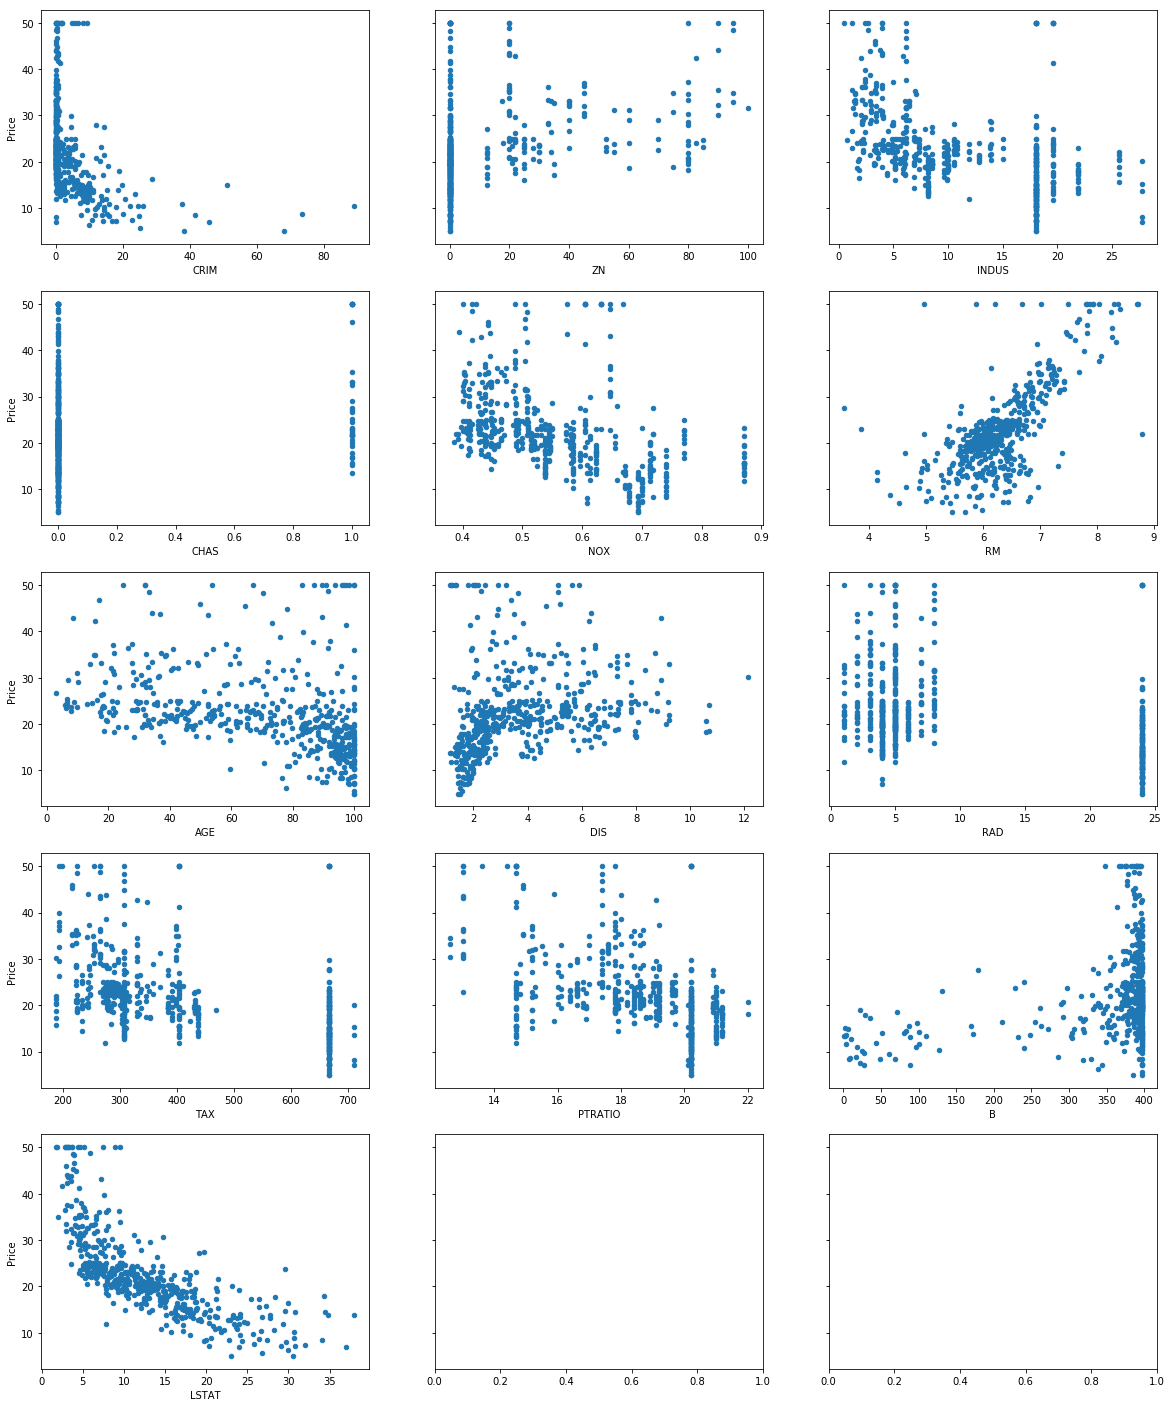

In [50]:
fig,axs=plt.subplots(5,3,sharey=True)
bos.plot(x='CRIM',y='Price',kind='scatter',ax=axs[0,0],figsize=(20,25))
bos.plot(x='ZN',y='Price',kind='scatter',ax=axs[0,1])
bos.plot(x='INDUS',y='Price',kind='scatter',ax=axs[0,2])
bos.plot(x='CHAS',y='Price',kind='scatter',ax=axs[1,0])
bos.plot(x='NOX',y='Price',kind='scatter',ax=axs[1,1])
bos.plot(x='RM',y='Price',kind='scatter',ax=axs[1,2])
bos.plot(x='AGE',y='Price',kind='scatter',ax=axs[2,0])
bos.plot(x='DIS',y='Price',kind='scatter',ax=axs[2,1])
bos.plot(x='RAD',y='Price',kind='scatter',ax=axs[2,2])
bos.plot(x='TAX',y='Price',kind='scatter',ax=axs[3,0])
bos.plot(x='PTRATIO',y='Price',kind='scatter',ax=axs[3,1])
bos.plot(x='B',y='Price',kind='scatter',ax=axs[3,2])
bos.plot(x='LSTAT',y='Price',kind='scatter',ax=axs[4,0])

Getting realtion using correlation.

In [53]:
crr=bos.corr().abs()
crr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,0.200469,0.406583,0.055892,0.420972,0.219247,0.352734,0.379670,0.625505,0.582764,0.289946,0.385064,0.455621,0.388305
ZN,0.200469,1.000000,0.533828,0.042697,0.516604,0.311991,0.569537,0.664408,0.311948,0.314563,0.391679,0.175520,0.412995,0.360445
INDUS,0.406583,0.533828,1.000000,0.062938,0.763651,0.391676,0.644779,0.708027,0.595129,0.720760,0.383248,0.356977,0.603800,0.483725
CHAS,0.055892,0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,0.099176,0.007368,0.035587,0.121515,0.048788,0.053929,0.175260
NOX,0.420972,0.516604,0.763651,0.091203,1.000000,0.302188,0.731470,0.769230,0.611441,0.668023,0.188933,0.380051,0.590879,0.427321
RM,0.219247,0.311991,0.391676,0.091251,0.302188,1.000000,0.240265,0.205246,0.209847,0.292048,0.355501,0.128069,0.613808,0.695360
AGE,0.352734,0.569537,0.644779,0.086518,0.731470,0.240265,1.000000,0.747881,0.456022,0.506456,0.261515,0.273534,0.602339,0.376955
DIS,0.379670,0.664408,0.708027,0.099176,0.769230,0.205246,0.747881,1.000000,0.494588,0.534432,0.232471,0.291512,0.496996,0.249929
RAD,0.625505,0.311948,0.595129,0.007368,0.611441,0.209847,0.456022,0.494588,1.000000,0.910228,0.464741,0.444413,0.488676,0.381626
TAX,0.582764,0.314563,0.720760,0.035587,0.668023,0.292048,0.506456,0.534432,0.910228,1.000000,0.460853,0.441808,0.543993,0.468536


Removing outliers using z Score-

In [56]:
from scipy import stats

In [57]:
z=np.abs(stats.zscore(bos))
z

array([[0.41978194, 0.28482986, 1.2879095 , ..., 0.44105193, 1.0755623 ,
        0.15968566],
       [0.41733926, 0.48772236, 0.59338101, ..., 0.44105193, 0.49243937,
        0.10152429],
       [0.41734159, 0.48772236, 0.59338101, ..., 0.39642699, 1.2087274 ,
        1.32424667],
       ...,
       [0.41344658, 0.48772236, 0.11573841, ..., 0.44105193, 0.98304761,
        0.14880191],
       [0.40776407, 0.48772236, 0.11573841, ..., 0.4032249 , 0.86530163,
        0.0579893 ],
       [0.41500016, 0.48772236, 0.11573841, ..., 0.44105193, 0.66905833,
        1.15724782]])

See how many data are above 3 zscore

In [167]:
df=bos[(z<3).all(axis=1)]
feat_columns=df.columns


In [168]:
X=bos[feat_columns]
y=bos['Price']

In [169]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [171]:
regressor=LinearRegression()

In [172]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [173]:
y_pred=np.array(regressor.predict(X_test))

In [174]:
y_target=np.array(y_test)

In [175]:
rmse=np.sqrt(((y_pred-y_target)**2).mean())
rmse

2.8375957540096383e-14

In [178]:
rmse=0.0000000000000283759575 #Approx

Creating model after removing outliers using z Score

In [179]:
X=bos[feat_columns]
y=bos['Price']

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [181]:
regressor.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [182]:
y_pred1=regressor.predict(X_test)

In [183]:
rmse2=np.sqrt(((np.array(y_pred1)-np.array(y_test))**2).mean())
rmse2

2.8375957540096383e-14

In [184]:
rmse2=0.0000000000000283759575 #Approx

In [185]:
coef=regressor.coef_
coef

array([-1.67535220e-15, -3.46944695e-16, -1.21983586e-15,  1.12103286e-15,
        2.07397474e-14, -1.59215089e-16, -3.38271078e-17, -3.80229702e-16,
       -2.29850861e-17,  4.85722573e-17,  1.06441548e-16, -2.91433544e-16,
       -2.54570670e-16,  1.00000000e+00])